In [1]:
#Part1-A)
import math

def grav_acc(s_x, s_y, Mp):
    """
    Calculates the gravitational acceleration acting on the spacecraft using its position and the mass of the planet. 
    (Applies Newton's Law of Universal Gravitation and Newton's Second Law of Motion.)

    Inputs:
        - s_x (float): x components of a single position vector in m.
        - s_y (float): y components of a single position vector in m.
        - Mp (float): the mass of the planet in kg.

    Outputs:
        tuple: (a_x, a_y)
            - a_x: x components of instantaneous spacecraft acceleration in m s^{-2}.
            - a_y: y components of instantaneous spacecraft acceleration in m s^{-2}.
    """
    # 우주선과 행성간의 거리 계산 
    s = math.sqrt(s_x**2 + s_y**2)

    # 중력 상수 
    gravity = (6.67e-11)

    # 가속도의 크기               
    acceleration = gravity * Mp / s**2

    # 가속도의 방향 성분
    sinB = -s_x/s
    cosB = -s_y/s

    # 가속도 성분 계산 
    a_x = acceleration * sinB
    a_y = acceleration * cosB

    return a_x,a_y

In [2]:
#Part2-function2

import math

def checkinit(s_x0, s_y0, v_x0, v_y0, Rp):
    
    """
    checks whether the initial spacecraft conditions are valid
    
    conditions:
    
    1. spacecraft starts moving above planetary surface  |s| > Rp
    2. spacecraft's initial motion is directed towards the planet: v_y0 > 0
        
    Inputs:
        - s_x0, s_y0 (float): initial spacecraft position components in meters
        - v_x0, v_y0 (float): initial spacecraft velocity components in m/s
        - Rp (float): radius of the planet in meters
    
    Outputs:
        None
        
    Raises: 
        ValueError: if the initial position is invalid or if the velocity is not directed toward the planet.
    """
    
    # 행성으로부터의 길이 측정
    s_magnitude = math.sqrt(s_x0**2 + s_y0**2)

    # 행성으로부터의 길이가 행성의 반지름보다 큰지 아닌지 체크, 아닌 경우 ValueError
    if s_magnitude <= Rp:
        raise ValueError("Initial position must be above the planetary surface.")

    # 행성을 향하는 속도의 y 방향이 0보다 큰지 (양수) 체크, 아닌 경우 ValueError
    if v_y0 <= 0:
        raise ValueError("Initial velocity must be in the positive y-direction.")

    # 두 조건 다 통과하면(둘다 False), None을 return한다 
    return None

In [3]:
def sc_vel_pos_change(a_x, a_y, v_x, v_y, time_step):
    """
    Computes the instantaneous change in position (ds_x, ds_y) 
    and velocity (dv_x, dv_y) of the spacecraft over a time-step (time_step).
    
    Inputs: a_x, a_y, v_x, v_y, time_step
    Outputs: ds_x, ds_y, dv_x, dv_y

    """
    # 속도 변화량
    dv_x = a_x * time_step
    dv_y = a_y * time_step

    # 위치 변화량
    ds_x = (v_x * time_step) + 0.5*a_x*(time_step**2)
    ds_y = (v_y * time_step) + 0.5*a_y*(time_step**2)

    return ds_x,ds_y,dv_x,dv_y

In [5]:
import numpy as np

def get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, Mp, Rp):
    """
    Computes a full spacecraft trajectory by integrating the equations of motion.

    Usage:
    time, acc, vel, pos = get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, Mp, Rp)

    """

    #초기값 검사
    checkinit(s_x0, s_y0, v_x0, v_y0, Rp)

    # n_steps = 몇번의 시간 간격 (time_step)을 거쳐야 total_time에 도달하는지
    # nt = 총 몇 개의 지점에 대한 데이터를 저장해야하는지 (t는 0부터 시작하니까 +1)
    n_steps = int(total_time / time_step)
    nt = n_steps + 1

    #초기화 
    time = np.zeros(nt)
    pos = np.zeros((nt, 2))  # (s_x, s_y) 2D
    vel = np.zeros((nt, 2))  # (v_x, v_y) 2D
    acc = np.zeros((nt, 2))  # (a_x, a_y) 2D

    #현재 위치 설정
    pos[0,0] = s_x0
    pos[0,1] = s_y0
    vel[0,0] = v_x0
    vel[0,1] = v_y0

    time[0] = 0.0

    # t=0 가속도
    a_x0, a_y0 = grav_acc(s_x0, s_y0, Mp)
    acc[0,0] = a_x0
    acc[0,1] = a_y0

    # 초기(현재) 위치 및 속도 설정
    s_x_curr, s_y_curr = s_x0, s_y0
    v_x_curr, v_y_curr = v_x0, v_y0

    for i in range(1,nt):

        # 현재 가속도
        acc_x_curr, acc_y_curr = acc[i-1,0], acc[i-1,1]

        ds_x, ds_y, dv_x, dv_y = sc_vel_pos_change(acc_x_curr, acc_y_curr, v_x_curr, v_y_curr, time_step)

        # 현재 위치와 속도에 계산된 위치 변화량과 속도 변화량을 더함.
        s_x_next = s_x_curr + ds_x
        s_y_next = s_y_curr + ds_y
        v_x_next = v_x_curr + dv_x
        v_y_next = v_y_curr + dv_y
        
        # 다음 가속도 계산 
        a_x_next, a_y_next = grav_acc(s_x_next, s_y_next, Mp)

        # 새로운 값 추가 
        pos[i, 0], pos[i, 1] = s_x_next, s_y_next
        vel[i, 0], vel[i, 1] = v_x_next, v_y_next
        acc[i, 0], acc[i, 1] = a_x_next, a_y_next
        time[i] = time[i-1] + time_step

        # 다음 루프를 위한 현재 값 업데이트
        s_x_curr, s_y_curr = s_x_next, s_y_next
        v_x_curr, v_y_curr = v_x_next, v_y_next 

    return time, acc, vel, pos


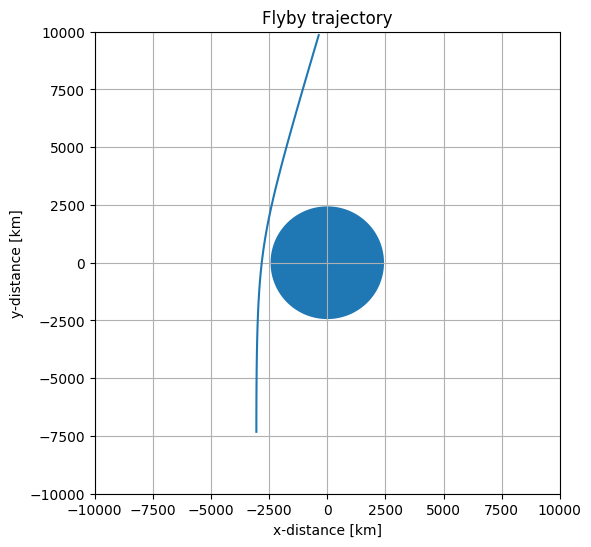

In [25]:
import matplotlib.pyplot as plt

# 기본 정보
Mp = 3.3e23
Rp = 2440e3

total_time = 40 * 60
time_step = 60

s_x0 = -3050e3
s_y0 = -3 * Rp

v_x0 = 0.0
v_y0 = 7e3

# function 이용해서 time, acc, vel, pos 할당
time, acc, vel, pos = get_traj(s_x0, s_y0, v_x0, v_y0, time_step, total_time, Mp, Rp)

# figure 사이즈 설정
plt.figure(figsize = (6, 6))

# 우주선 궤적 그리기
plt.plot(pos[:, 0] / 1e3, pos[:, 1] / 1e3)

# mercury 원 그리기
theta = np.linspace(0, 2*np.pi, 500)
x_circle = (Rp * np.cos(theta)) / 1e3
y_circle = (Rp * np.sin(theta)) / 1e3
plt.fill(x_circle, y_circle)


# fig1 파일에 맞춰서 xlim, ylim 조정
plt.xlim(-10000, 10000)
plt.ylim(-10000, 10000)

# 기타 그래프 요소 설정
plt.xlabel("x-distance [km]")
plt.ylabel("y-distance [km]")
plt.title("Flyby trajectory")
plt.grid(True)
plt.show()

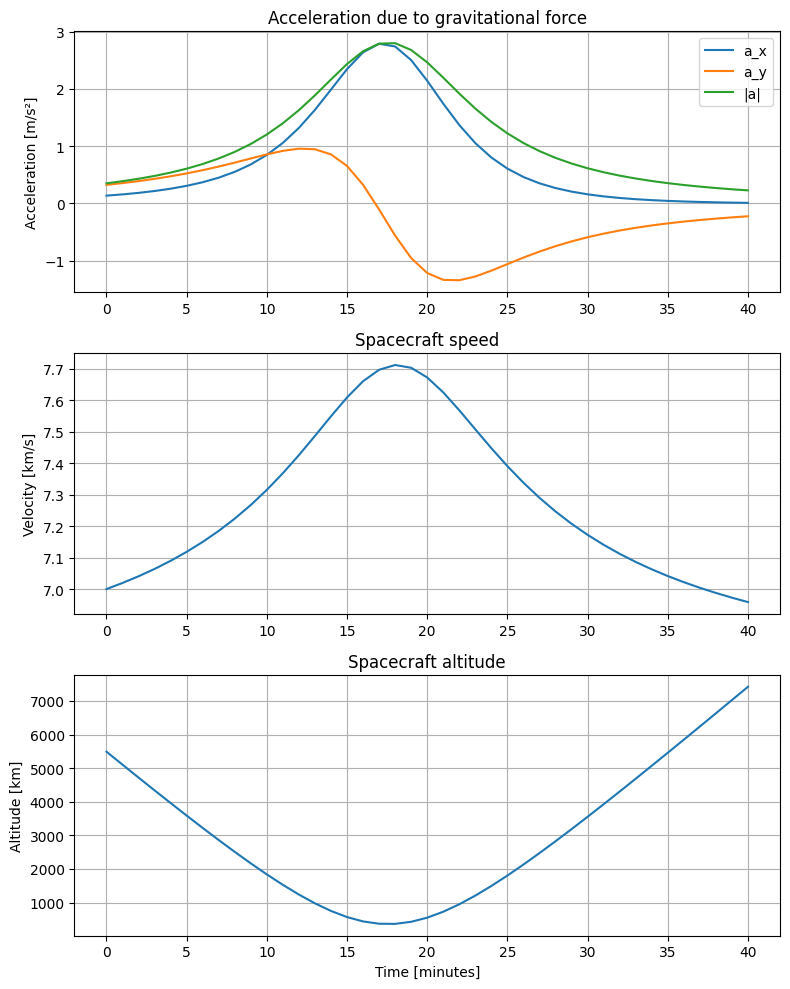

In [26]:
# 시간 (분 단위)
time_min = time / 60

# 가속도 성분
a_x = acc[:, 0]
a_y = acc[:, 1]
a_magnitude = np.sqrt(a_x**2 + a_y**2)

# 속도 
speed = np.sqrt(vel[:, 0]**2 + vel[:, 1]**2)
speed_kms = speed / 1e3 # convert m -> km

# 고도
dis_from_center = np.sqrt(pos[:, 0]**2 + pos[:, 1]**2)
altitude = (dis_from_center - Rp) / 1e3 # convert m -> km

closest_alt = altitude.min

# Figure 2
plt.figure(figsize=(8, 10))

# Subplot 1: acceleration
plt.subplot(3, 1, 1)
plt.plot(time_min, a_x, label="a_x")
plt.plot(time_min, a_y, label="a_y")
plt.plot(time_min, a_magnitude, label="|a|")
plt.title("Acceleration due to gravitational force")
plt.ylabel("Acceleration [m/s²]")
plt.legend()
plt.grid(True)

# Subplot 2: speed
plt.subplot(3, 1, 2)
plt.plot(time_min, speed_kms)
plt.title("Spacecraft speed")
plt.ylabel("Velocity [km/s]")
plt.grid(True)

# Subplot 3: altitude
plt.subplot(3, 1, 3)
plt.plot(time_min, altitude)
plt.title("Spacecraft altitude")
plt.ylabel("Altitude [km]")
plt.xlabel("Time [minutes]")
plt.grid(True)

plt.tight_layout()
plt.show()
